## Intro
I will be analyzing Titanic Data which contains demographics and passenger information from 891 of the 2224 passengers and crew on board the Titanic.

Below you can find all the steps I have performed to answer questions about the data, mainly what factors made passengers more likely to survive

## Importing libraries

In [20]:
%pylab inline
import unicodecsv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


## Importing CSV with data
Importing data with Pandas `read_csv` function. Then outputting first 10 rows to get acquainted with the data structure.

In [79]:
titanic_df = pd.read_csv('titanic-data.csv', sep=',')
titanic_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


Looking at the data above I can conclude that to answer my question stated in the Intro section I can use **Survived** as my dependent variable. As independeent variables I chose **Pclass** (Passenger Class), **Sex**, **Age**, **SibSp** (Number of Siblings/Spouses Aboard), **Parch** (Number of Parents/Children Aboard).

## Investigating the Data

Firstly, I want to make sure that there are no values missing for my dependent and independent variables. To do this I will calculate the number of NaNs for variables.

In [118]:
print 'Total number of rows: ', len(titanic_df), '\n'

def check_missing_values(df, index):
    for i in index:
        print 'Number of missing',i,'data points:', df[i].isnull().sum()
    
check_missing_values(titanic_df, ['Survived', 'Pclass','Sex','Age','SibSp', 'Parch'])

Total number of rows:  891 

Number of missing Survived data points: 0
Number of missing Pclass data points: 0
Number of missing Sex data points: 0
Number of missing Age data points: 177
Number of missing SibSp data points: 0
Number of missing Parch data points: 0


From the above we see that there are **177** records out of **891** (20%) that have age missing. 20% is a significant portion of the dataset and I do not want to exclude the passangers with a missing age data point from my analysis. To fix the problem I will fill the missing values with the median age for Passanger Class & Gender group.

In [81]:
titanic_df.groupby(['Pclass', 'Sex'])['Age'].median()

Pclass  Sex   
1       female    35.0
        male      40.0
2       female    28.0
        male      30.0
3       female    21.5
        male      25.0
Name: Age, dtype: float64

In [161]:
##Adding column for the new age data to the dataframe
titanic_df['new_age'] = titanic_df['Age']

grouped_data = titanic_df.groupby(['Pclass', 'Sex'])['Age']
titanic_df['new_age'].fillna(grouped_data.transform("median"), inplace=True)

## Checking the results of manipulation
check_missing_values(titanic_df, ['new_age'])
titanic_df.head(5)

Number of missing new_age data points: 0


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,new_age,sex_int
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,22.0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,38.0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,26.0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,35.0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,35.0,1


Secondly, one of the independent variables I chose (**Sex**) is not in the numeric format. I will create a new column **sex_int** with 1 or 0 values for Male or Female respectively. 

In [164]:
##Adding column for the new sex data to the dataframe
titanic_df['sex_int'] = NaN

##Transfom male or female values to 1 or 0 integer values
def transform_to_int(value):
    if value == 'male':
        return 1
    elif value =='female':
         return 0

titanic_df['sex_int'] = titanic_df[['Sex']].applymap(transform_to_int)
## Checking the results of manipulation 
titanic_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,new_age,sex_int
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,22.0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,38.0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,26.0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,35.0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,35.0,1


Now, the data looks clean and we can proceed to analyzing it. First, I want to know the statistics for the age of survived passengers.

Mean: 28.1086842105
Standard deviation: 14.010565212
Minimum: 0.42
Maximum: 80.0


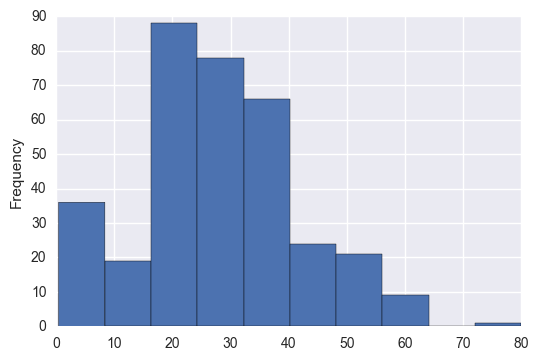

In [244]:
##Summarize the data
def describe_data(df):
    print 'Mean:', df.mean()
    print 'Standard deviation:', df.std()
    print 'Minimum:', df.min()
    print 'Maximum:', df.max()
    df.plot(kind='hist')

describe_data(titanic_df.loc[titanic_df['Survived'] == 1]['new_age'])

We can see that the average age for survivor is about 28 years. With the most survivors having age between 20 and 40 years. Now is there a correlation between age and survival?

In [245]:
##Prints out a correlation matrix
titanic_df[['Survived','new_age']].corr()

,Survived,new_age
Survived,1.000000,-0.059579
new_age,-0.059579,1.000000


Correlation coefficient is negative which means there might be a negative correlation between age and survival (the higher the age the lower the chance of survival). However the absolute value of the coefficient is very low so there is little to no correlation between age and survival.

In [270]:
##Percent of surived in each class.
print (titanic_df.groupby('Pclass')['Survived'].sum() / titanic_df.groupby('Pclass')['PassengerId'].count())*100

Pclass
1    62.962963
2    47.282609
3    24.236253
dtype: float64


 About **63%** of passengers who belonged to the 1st class survived, **47%** who belonged to thr 2nd class, and **24%** for the 3rd class. Whic is explaiend by the fact that the better the class the more privileged you were on the ship, having rooms closer to the top of the ship, etc.
 
 Next, I want to see if there is a statistical correlation between Passenger Class and likelyhood to survive. To do this I will calculate correlation coefficient.

In [261]:
titanic_df[['Survived','Pclass']].corr()

,Survived,Pclass
Survived,1.000000,-0.338481
Pclass,-0.338481,1.000000


Correlation coefficient is negative which means there might be a negative correlation between class and survival (i.e 1st class more likely to survive than 2nd and 3rd and 2nd is more likely to survive than 3rd). The absolute value of the coefficient suggest that there is correlation though it is not very high. 

Now, after we discovered that there might be a higher chance of survival if the passenger belonged to the first class. I want to investigate data within classes. What characteristics have made a person more likely to survive within classes?

In [260]:
 titanic_df.groupby('Pclass')[['Survived','sex_int']].corr()

Survived   sex_int
Pclass                             
1      Survived  1.000000 -0.615212
       sex_int  -0.615212  1.000000
2      Survived  1.000000 -0.753121
       sex_int  -0.753121  1.000000
3      Survived  1.000000 -0.387313
       sex_int  -0.387313  1.000000

In [173]:
titanic_df.groupby(['Pclass', 'sex_int'])['sex_int'].count()
print titanic_df.groupby(['Pclass'])['PassengerId'].count()

Pclass
1    216
2    184
3    491
Name: PassengerId, dtype: int64
